In [1]:
# import required package for data handling and analyzation
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# import required packages for splitting data
#from sklearn import model_selection
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split

# import required packages for evaluating models
#from sklearn import metrics
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#rom sklearn.metrics import roc_auc_score
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
#from sklearn.linear_model import LogisticRegression

In [3]:
#initial importing of the raw data to be cleaned
df = pd.read_excel('Competition1_raw_data.xlsx',na_values=r'-')

In [4]:
#taking a look at the data to see if there are any visivble errors
#10 shows "-" as blank values
df.head(15)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [5]:
df.info() # getting more info on the data
#df.describe() #not needed at the moment because all types are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [6]:
df_copy = df.copy() # making a copy of the dataframe to preserve the original data

In [7]:
#initial attempt to change the data types
df_copy.iloc[:,3:8].astype(float)
df_copy.iloc[:,9:].astype(float)
df_copy['C2'] = df_copy['C2'].astype('category')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


In [8]:
df_copy.iloc[[10,86,268,330,400,490,597,614],2]

10     NaN
86     NaN
268    NaN
330    NaN
400    NaN
490    NaN
597    NaN
614    NaN
Name: I3, dtype: object

In [9]:
missing_I3 = [8051,5122,6798,6199,8221,3200,6099,4724] 
#we looked up the respective companies' missing SIC codes to populate the SIC variable

In [10]:
df_copy.iloc[[10,86,268,330,400,490,597,614],2] = missing_I3
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


In [11]:
# col_list = df_copy.columns.tolist()
# del col_list[0:4]
# del col_list[4]

#### Think about this question, “Given my data … if there is a deviation from normality, will there be a material impact my results?”

#### In doing so are three tests you might want to consider:

    -The Shapiro-Wilk test;
    -The Anderson-Darling test, and;
    -The Kolmogorov-Smirnov test.

#### As well, there are some visual measures to be implemented:

    -Box Plots
    -QQ Plots

In [12]:
#sm.qqplot(df_copy['C7'])

In [13]:
#float_cols = col_list
#replacement = df_copy.loc[:,float_cols]
#print(replacement)

In [14]:
#float_cols

In [15]:
# issolate the value of the issue then convert it to NaN
#issue = df_copy.iloc[10,4]
#print(issue)
#soulution = float('Nan')
#import re
#df_copy.replace(to_replace= r'^-', value=soulution,regex=True, inplace =True)

In [16]:
# test if the issue is resolved and to see if unintedned values were changed
#print(df_copy.head(11))
#print(df_copy.iloc[162,1],df_copy.iloc[10,4])

In [17]:
# second attempt to convert dtypes to match the data dictionary
#df_copy.iloc[:,3:8].astype(float)
#df_copy.iloc[:,9:].astype(float)
#df_copy['C2'] = df_copy['C2'].astype('category')
#df_copy.dtypes

In [18]:
# now we can look a the statistical description of the data
# also include all featured to determine if the the stock symbols and names (I1 & I2) has duplicates
df_copy.describe(include='all')

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682,682,682.0,677.000000,672.000000,672.000000,660.000000,660.000000,660.0,646.000000,...,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
unique,682,682,207.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ETRM,KEYW HOLDING CORP,2834.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,76.0,NaN,NaN,NaN,NaN,NaN,567.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.837666,15.481190,13.515045,25.934766,149.728788,NaN,1.788904,...,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,NaN,NaN,NaN,6.053731,6.653429,5.835646,73.234948,152.817467,NaN,162.666532,...,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,NaN,NaN,NaN,3.000000,0.000000,3.000000,0.000000,10.000000,NaN,-786.239000,...,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,NaN,NaN,NaN,10.000000,12.500000,11.000000,11.000000,85.000000,NaN,-0.852500,...,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,NaN,NaN,NaN,13.500000,15.000000,13.000000,14.845000,107.000000,NaN,0.010000,...,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,NaN,NaN,NaN,17.000000,17.000000,15.000000,20.485000,155.250000,NaN,0.470000,...,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000


In [19]:
df_copy.isnull().sum()

I1          0
I2          0
I3          0
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64

In [35]:
#use value_counts to visualize the number of observations for IPO Prices
#df_copy['P(IPO)'].value_counts (bins=20)
#Conclusion from the below - most IPO prices are between $11.20 and $15.30;
#and the distribution looks relatively "normal"

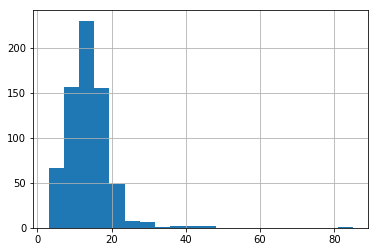

In [36]:
#use histogram to visualize the # of observations for IPO prices
df_copy['P(IPO)'].hist (bins=20)

In [37]:
#use value_counts to visualize the number of observations for IPO 1Day Prices
#df_copy['P(1Day)'].value_counts (bins=20)
#Conclusion from the below - most IPO 1Day prices are less than or equal to $57.96;
#however, the distribution appears to display some right skewness (i.e., longer right tail)

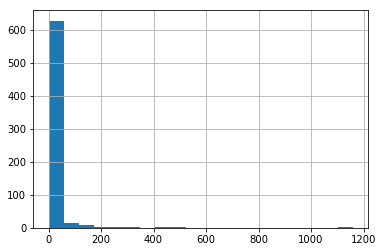

In [43]:
#use histogram to visualize the # of observations for IPO 1Day prices
df_copy['P(1Day)'].hist (bins=20)

In [39]:
#use value_counts to visualize the number of observations for Pre-IPO High - P(H) - Prices
#df_copy['P(H)'].value_counts (bins=20)
#Conclusion from the below - most Pre-IPO High prices are between $13.50 and $20.25;
#however the data appear to have some left skewness (i.e., longer left tail)

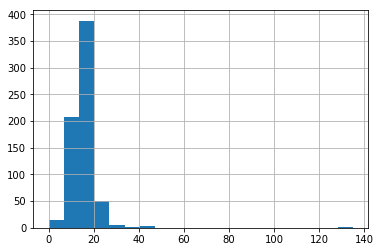

In [40]:
#use histogram to visualize the # of observations for Pre-IPO H prices
df_copy['P(H)'].hist (bins=20)

In [41]:
#use value_counts to visualize the number of observations for Pre-IPO Low - P(L) - Prices
#df_copy['P(L)'].value_counts (bins=20)
#Conclusion from the below - most Pre-IPO Low prices are between $8.25 and $13.5;
#however the data appear to have some right skewness (i.e., longer right tail)

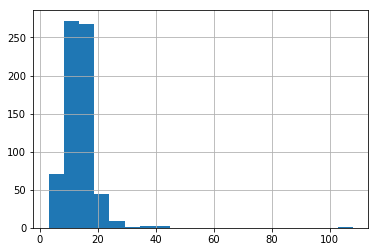

In [30]:
#use histogram to visualize the # of observations for Pre-IPO L prices
df_copy['P(L)'].hist (bins=20)

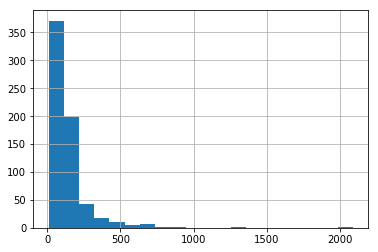

In [44]:
df_copy['C1'].hist (bins=20)

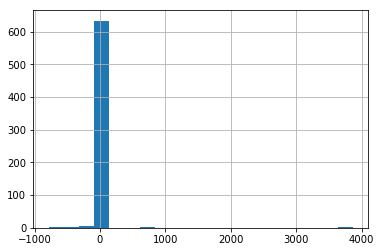

In [45]:
df_copy['C3'].hist (bins=20)

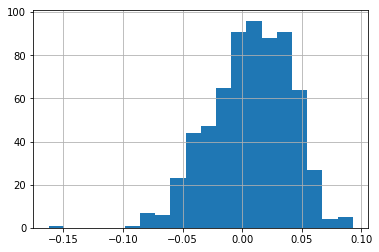

In [46]:
df_copy['C4'].hist (bins=20)

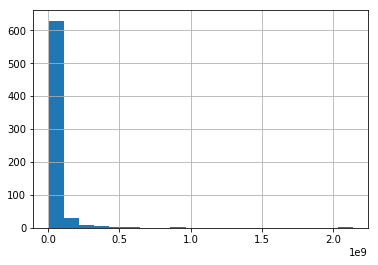

In [47]:
df_copy['C5'].hist (bins=20)

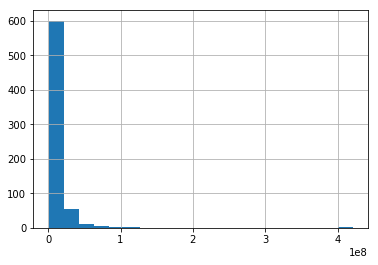

In [48]:
df_copy['C6'].hist (bins=20)

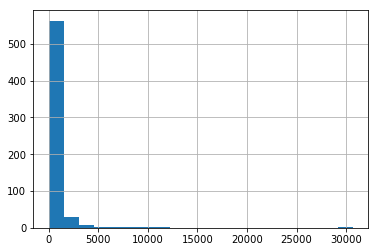

In [49]:
df_copy['C7'].hist (bins=20)

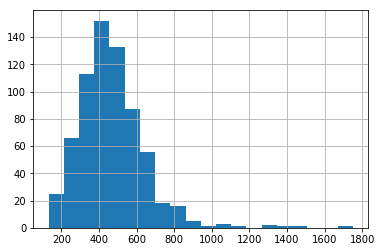

In [50]:
df_copy['T1'].hist (bins=20)

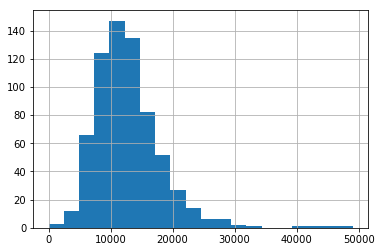

In [51]:
df_copy['T2'].hist (bins=20)

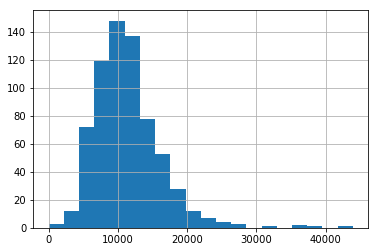

In [52]:
df_copy['T3'].hist (bins=20)

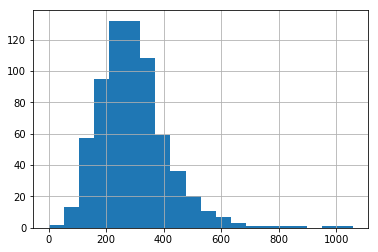

In [53]:
df_copy['T4'].hist (bins=20)

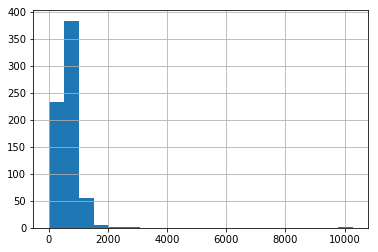

In [54]:
df_copy['T5'].hist (bins=20)

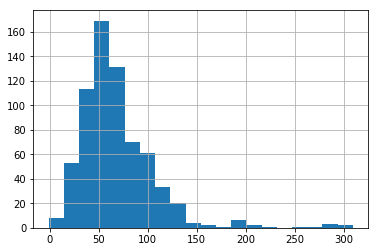

In [55]:
df_copy['S1'].hist (bins=20)

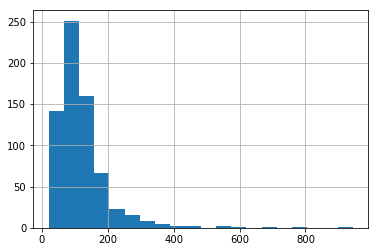

In [56]:
df_copy['S2'].hist (bins=20)

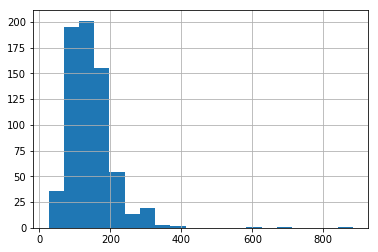

In [57]:
df_copy['S3'].hist (bins=20)

In [59]:
#try a histogram - after dropping NaNs in P(IPO)
#df_copy2 = df_copy.dropna()
#df_copy2.isnull().sum()

In [60]:
#df_copy['P(IPO)'].hist (bins=20)
#df_copy['P(1Day)'].hist (bins=20)
#df_copy['P(H)'].hist (bins=20)
#df_copy['P(L)'].hist (bins=20)
#df.plot.hist(bins=12, alpha=0.5)
#plt.hist('P(IPO)', label='IPO Offer Price')
#Conclusion from the below - most Pre-IPO Low prices are between $8.25 and $13.5;
#however the data appear to have some right skewness (i.e., longer right tail)

In [61]:
#Set category type for I1, I2, I3 - done to try to get plot to work...it does not work
#df_copy['I1'] = df_copy['I1'].astype('category')
#df_copy['I2'] = df_copy['I2'].astype('category')
#df_copy['I3'] = df_copy['I3'].astype('category')
#df_copy.info()

In [34]:
#use matplotlib for visualizations of the data
#import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#%matplotlib inline

#plt.plt(P(IPO), label='IPO Offer Price')
#plt.plot(year, lynxes, label='Lynxes')
#plt.plot(year, carrots, label='Carrots')
#plt.legend( ('Hares','Lynxes','Carrots') )
#plt.ylabel('Price')
#plt.xlabel('Ticker')
#plt.show()